### Testing decomposition rules

In [1]:
from openqaoa.qaoa_parameters import *
from openqaoa.qaoa_parameters import create_qaoa_variational_params

In [2]:
from openqaoa.qaoa_parameters.baseparams import QAOACircuitParams
from openqaoa.backends.qpus.qpu_auth import AccessObjectQiskit, AccessObjectPyQuil
from openqaoa.backends.qaoa_backend import *
from openqaoa.backends.simulators.qaoa_pyquil_sim import QAOAPyQuilWavefunctionSimulatorBackend
from openqaoa.backends.qpus.qaoa_pyquil_qpu import QAOAPyQuilQPUBackend
from openqaoa.backends.simulators.qaoa_qiskit_sim import QAOAQiskitBackendStatevecSimulator
from openqaoa.optimizers import get_optimizer
from openqaoa.utilities import *

In [3]:
from pyquil import Program, gates
from pyquil.api import WavefunctionSimulator
from pyquil.quilatom import Parameter

In [4]:
cost_hamil = Hamiltonian([PauliOp('ZZ', (0, 1)), PauliOp('ZZ', (1, 2)), PauliOp('ZZ', (0, 2)),
                          PauliOp('Z',(2,)),PauliOp('Z',(3,))], 
                         [1, 1, 1, 2, 2], 0)

In [5]:
cost_hamil.expression

0 + 1Z_{0}Z_{1} + 1Z_{0}Z_{2} + 1Z_{1}Z_{2} + 2Z_{2} + 2Z_{3}

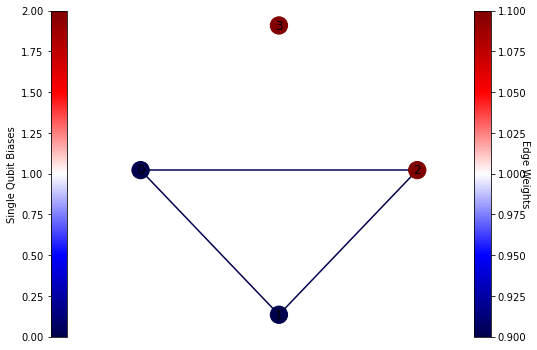

In [6]:
plot_graph(graph_from_hamiltonian(cost_hamil))

In [7]:
mixer_hamil = X_mixer_hamiltonian(n_qubits=4)
mixer_hamil.expression

-1X_{0} - 1X_{1} - 1X_{2} - 1X_{3} + 0

In [8]:
circuit_params = QAOACircuitParams(cost_hamil, mixer_hamil, p=2)

In [9]:
variate_params = create_qaoa_variational_params(circuit_params,'standard','ramp')

In [10]:
variate_params

Standard Parameterisation:
	p: 2
Variational Parameters:
	betas: [0.525 0.175]
	gammas: [0.175 0.525]

#### pyquil QPU

In [11]:
# prog = Program()
# aaa = prog.declare('aaa','REAL',1)
# prog += gates.RZ(2*aaa,1)
# bbb = prog.declare('bbb','REAL',1)
# prog += gates.RZ(bbb,1)
# ccc = prog.declare('ccc','REAL',1)
# prog += gates.RZ(ccc,1)
# print(prog)

In [ ]:
access_object_pyquil = AccessObjectPyQuil(name = "Aspen-11", as_qvm=True, execution_timeout = 500)
backend_pyquil_qpu = get_qaoa_backend(circuit_params,access_object_pyquil,n_shots=1000)

In [16]:
print(backend_pyquil_qpu.parametric_circuit)

DECLARE ro BIT[4]
H 1
H 3
H 5
H 7
DECLARE pauli2qcost00 REAL[1]
RZ(pauli2qcost00) 1
RZ(pauli2qcost00) 3
CPHASE(-2*pauli2qcost00) 1 3
DECLARE pauli2qcost01 REAL[1]
RZ(pauli2qcost01) 3
RZ(pauli2qcost01) 5
CPHASE(-2*pauli2qcost01) 3 5
DECLARE pauli2qcost02 REAL[1]
RZ(pauli2qcost02) 1
RZ(pauli2qcost02) 5
CPHASE(-2*pauli2qcost02) 1 5
DECLARE pauli1qcost00 REAL[1]
RZ(pauli1qcost00) 5
DECLARE pauli1qcost01 REAL[1]
RZ(pauli1qcost01) 7
DECLARE pauli1qmixer00 REAL[1]
RX(pauli1qmixer00) 1
DECLARE pauli1qmixer01 REAL[1]
RX(pauli1qmixer01) 3
DECLARE pauli1qmixer02 REAL[1]
RX(pauli1qmixer02) 5
DECLARE pauli1qmixer03 REAL[1]
RX(pauli1qmixer03) 7
DECLARE pauli2qcost10 REAL[1]
RZ(pauli2qcost10) 1
RZ(pauli2qcost10) 3
CPHASE(-2*pauli2qcost10) 1 3
DECLARE pauli2qcost11 REAL[1]
RZ(pauli2qcost11) 3
RZ(pauli2qcost11) 5
CPHASE(-2*pauli2qcost11) 3 5
DECLARE pauli2qcost12 REAL[1]
RZ(pauli2qcost12) 1
RZ(pauli2qcost12) 5
CPHASE(-2*pauli2qcost12) 1 5
DECLARE pauli1qcost10 REAL[1]
RZ(pauli1qcost10) 5
DECLARE pauli1

In [14]:
print(backend_pyquil_qpu.parametric_circuit)

NameError: name 'backend_pyquil_qpu' is not defined

In [14]:
print(backend_pyquil_qpu.qaoa_circuit(variate_params))

DECLARE ro BIT[4]
DECLARE pauli2qcost00 REAL[1]
DECLARE pauli2qcost01 REAL[1]
DECLARE pauli2qcost02 REAL[1]
DECLARE pauli1qcost00 REAL[1]
DECLARE pauli1qcost01 REAL[1]
DECLARE pauli1qmixer00 REAL[1]
DECLARE pauli1qmixer01 REAL[1]
DECLARE pauli1qmixer02 REAL[1]
DECLARE pauli1qmixer03 REAL[1]
DECLARE pauli2qcost10 REAL[1]
DECLARE pauli2qcost11 REAL[1]
DECLARE pauli2qcost12 REAL[1]
DECLARE pauli1qcost10 REAL[1]
DECLARE pauli1qcost11 REAL[1]
DECLARE pauli1qmixer10 REAL[1]
DECLARE pauli1qmixer11 REAL[1]
DECLARE pauli1qmixer12 REAL[1]
DECLARE pauli1qmixer13 REAL[1]
RZ(pi) 42
RX(pi/2) 42
RZ(pi/2) 42
RX(-pi/2) 42
RZ(pi/2 + 1.0*pauli1qcost01[0]) 42
RX(pi/2) 42
RZ(1.0*pauli1qmixer03[0]) 42
RX(-pi/2) 42
RZ(1.0*pauli1qcost11[0]) 42
RX(pi/2) 42
RZ(1.0*pauli1qmixer13[0]) 42
RX(-pi/2) 42
RZ(-pi/2) 42
MEASURE 42 ro[3]
RZ(pi) 44
RX(pi/2) 44
RZ(pi/2) 44
RX(-pi/2) 44
RZ(1.0*pauli2qcost00[0]) 44
RZ(pi) 45
RX(pi/2) 45
RZ(pi/2) 45
RX(-pi/2) 45
RZ(1.0*pauli2qcost00[0]) 45
CPHASE(-2.0*pauli2qcost00[0]) 45 44


In [15]:
backend_pyquil_qpu.expectation(variate_params)

-3.3640000000000008

In [16]:
backend_pyquil_qpu.exact_solution

(-5.0, [array([0, 0, 1, 1]), array([1, 0, 1, 1]), array([0, 1, 1, 1])])

#### pyquil wavefunction simulator #TODO

In [19]:
# backend_pyquil_statevec = get_qaoa_backend(circuit_params, 'pyquil_statevec_simulator')

In [20]:
# # statevector = backend_pyquil_statevec.wavefunction(variate_params)
# # print(statevector)
# backend_pyquil_statevec.expectation(variate_params)

#### qiskit wavefunction simulator

In [21]:
backend_qiskit_statevec = get_qaoa_backend(circuit_params,'qiskit_statevec_simulator')

In [22]:
backend_qiskit_statevec.parametric_circuit.draw()

/home/leo/.local/lib/python3.8/site-packages/sympy/core/expr.py:3949: SymPyDeprecationWarning: 

expr_free_symbols method has been deprecated since SymPy 1.9. See
https://github.com/sympy/sympy/issues/21494 for more info.

  SymPyDeprecationWarning(feature="expr_free_symbols method",


┌───┐                                                         »
q0_0: ┤ H ├─■───────────────────────────────────────────────────────»
      ├───┤ │ZZ(['2q', 'cost', 0, 0])                               »
q0_1: ┤ H ├─■────────────────────────────■──────────────────────────»
      ├───┤                              │ZZ(['2q', 'cost', 0, 1])  »
q0_2: ┤ H ├──────────────────────────────■──────────────────────────»
      ├───┤┌──────────────────────────┐┌───────────────────────────┐»
q0_3: ┤ H ├┤ Rz(['1q', 'cost', 0, 1]) ├┤ Rx(['1q', 'mixer', 0, 3]) ├»
      └───┘└──────────────────────────┘└───────────────────────────┘»
«                                  ┌───────────────────────────┐»
«q0_0: ─■──────────────────────────┤ Rx(['1q', 'mixer', 0, 0]) ├»
«       │                          ├───────────────────────────┤»
«q0_1: ─┼──────────────────────────┤ Rx(['1q', 'mixer', 0, 1]) ├»
«       │ZZ(['2q', 'cost', 0, 2])  └┬──────────────────────────┤»
«q0_2: ─■───────────────────────────┤ Rz(['1q', 'cost', 0, 0]) ├»
«      ┌──────────────────────────┐┌┴──────────────────────────┤»
«q0_3: ┤ Rz(['1q', 'cost', 1, 1]) ├┤ Rx(['1q', 'mixer', 1, 3]) ├»
«      └──────────────────────────┘└───────────────────────────┘»
«                                                              »
«q0_0: ──■─────────────────────────────────────────────────────»
«        │ZZ(['2q', 'cost', 1, 0])                             »
«q0_1: ──■───────────────────────────■─────────────────────────»
«      ┌───────────────────────────┐ │ZZ(['2q', 'cost', 1, 1]) »
«q0_2: ┤ Rx(['1q', 'mixer', 0, 2]) ├─■─────────────────────────»
«      └───────────────────────────┘                           »
«q0_3: ────────────────────────────────────────────────────────»
«                                                              »
«                                 ┌───────────────────────────┐»
«q0_0: ─■─────────────────────────┤ Rx(['1q', 'mixer', 1, 0]) ├»
«       │                         ├───────────────────────────┤»
«q0_1: ─┼─────────────────────────┤ Rx(['1q', 'mixer', 1, 1]) ├»
«       │ZZ(['2q', 'cost', 1, 2]) └┬──────────────────────────┤»
«q0_2: ─■──────────────────────────┤ Rz(['1q', 'cost', 1, 0]) ├»
«                                  └──────────────────────────┘»
«q0_3: ────────────────────────────────────────────────────────»
«                                                              »
«                                   
«q0_0: ─────────────────────────────
«                                   
«q0_1: ─────────────────────────────
«      ┌───────────────────────────┐
«q0_2: ┤ Rx(['1q', 'mixer', 1, 2]) ├
«      └───────────────────────────┘
«q0_3: ─────────────────────────────
«

In [23]:
backend_qiskit_statevec.qaoa_circuit(variate_params).draw()

┌───┐                                                  »
q0_0: ┤ H ├──■───────────────────────────────────────────────»
      ├───┤  │ZZ(0.350000000000000)                          »
q0_1: ┤ H ├──■────────────────────────■──────────────────────»
      ├───┤                           │ZZ(0.350000000000000) »
q0_2: ┤ H ├───────────────────────────■──────────────────────»
      ├───┤┌───────────────────────┐┌───────────────────────┐»
q0_3: ┤ H ├┤ Rz(0.700000000000000) ├┤ Rx(-1.05000000000000) ├»
      └───┘└───────────────────────┘└───────────────────────┘»
«                              ┌───────────────────────┐ »
«q0_0: ─■──────────────────────┤ Rx(-1.05000000000000) ├─»
«       │                      ├───────────────────────┤ »
«q0_1: ─┼──────────────────────┤ Rx(-1.05000000000000) ├─»
«       │ZZ(0.350000000000000) ├───────────────────────┤ »
«q0_2: ─■──────────────────────┤ Rz(0.700000000000000) ├─»
«      ┌──────────────────────┐├───────────────────────┴┐»
«q0_3: ┤ Rz(2.10000000000000) ├┤ Rx(-0.350000000000000) ├»
«      └──────────────────────┘└────────────────────────┘»
«                                                                             »
«q0_0: ──■──────────────────────────────────────────────■─────────────────────»
«        │ZZ(1.05000000000000)                          │                     »
«q0_1: ──■───────────────────────■──────────────────────┼─────────────────────»
«      ┌───────────────────────┐ │ZZ(1.05000000000000)  │ZZ(1.05000000000000) »
«q0_2: ┤ Rx(-1.05000000000000) ├─■──────────────────────■─────────────────────»
«      └───────────────────────┘                                              »
«q0_3: ───────────────────────────────────────────────────────────────────────»
«                                                                             »
«      ┌────────────────────────┐                          
«q0_0: ┤ Rx(-0.350000000000000) ├──────────────────────────
«      ├────────────────────────┤                          
«q0_1: ┤ Rx(-0.350000000000000) ├──────────────────────────
«      └┬──────────────────────┬┘┌────────────────────────┐
«q0_2: ─┤ Rz(2.10000000000000) ├─┤ Rx(-0.350000000000000) ├
«       └──────────────────────┘ └────────────────────────┘
«q0_3: ────────────────────────────────────────────────────
«

In [24]:
backend_qiskit_statevec = get_qaoa_backend(circuit_params, 'qiskit_statevec_simulator')

In [25]:
print(backend_qiskit_statevec.expectation(variate_params))
print(backend_qiskit_statevec.expectation_w_uncertainty(variate_params))

-3.433133222123363
(-3.433133222123363, 2.3118519395354693)


#### qiskit noisy shot based simulator

In [26]:
from qiskit.providers.aer.noise import NoiseModel
from qiskit import IBMQ
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q-startup','entropica-labs','reservations')
backend = provider.get_backend('ibmq_guadalupe')
noise_model = NoiseModel.from_backend(backend)

In [27]:
backend_qiskit_shot = get_qaoa_backend(circuit_params, 'qiskit_shot_simulator', n_shots=1000000, noise_model=noise_model)

In [28]:
print(backend_qiskit_shot.expectation(variate_params))
print(backend_qiskit_shot.expectation_w_uncertainty(variate_params))

-3.1743560000000004
(-3.1684720000000004, 2.5161305978060833)


In [29]:
current_ckt = backend_qiskit_shot.qaoa_circuit(variate_params)

In [30]:
#print parametric qaoa circuit
backend_qiskit_shot.parametric_circuit.draw()

┌───┐                                                         »
  q2_0: ┤ H ├─■───────────────────────────────────────────────────────»
        ├───┤ │ZZ(['2q', 'cost', 0, 0])                               »
  q2_1: ┤ H ├─■────────────────────────────■──────────────────────────»
        ├───┤                              │ZZ(['2q', 'cost', 0, 1])  »
  q2_2: ┤ H ├──────────────────────────────■──────────────────────────»
        ├───┤┌──────────────────────────┐┌───────────────────────────┐»
  q2_3: ┤ H ├┤ Rz(['1q', 'cost', 0, 1]) ├┤ Rx(['1q', 'mixer', 0, 3]) ├»
        └───┘└──────────────────────────┘└───────────────────────────┘»
meas: 4/══════════════════════════════════════════════════════════════»
                                                                      »
«                                    ┌───────────────────────────┐»
«  q2_0: ─■──────────────────────────┤ Rx(['1q', 'mixer', 0, 0]) ├»
«         │                          ├───────────────────────────┤»
«  q2_1: ─┼──────────────────────────┤ Rx(['1q', 'mixer', 0, 1]) ├»
«         │ZZ(['2q', 'cost', 0, 2])  └┬──────────────────────────┤»
«  q2_2: ─■───────────────────────────┤ Rz(['1q', 'cost', 0, 0]) ├»
«        ┌──────────────────────────┐┌┴──────────────────────────┤»
«  q2_3: ┤ Rz(['1q', 'cost', 1, 1]) ├┤ Rx(['1q', 'mixer', 1, 3]) ├»
«        └──────────────────────────┘└───────────────────────────┘»
«meas: 4/═════════════════════════════════════════════════════════»
«                                                                 »
«                                                                »
«  q2_0: ──■─────────────────────────────────────────────────────»
«          │ZZ(['2q', 'cost', 1, 0])                             »
«  q2_1: ──■───────────────────────────■─────────────────────────»
«        ┌───────────────────────────┐ │ZZ(['2q', 'cost', 1, 1]) »
«  q2_2: ┤ Rx(['1q', 'mixer', 0, 2]) ├─■─────────────────────────»
«        └───────────────────────────┘                           »
«  q2_3: ────────────────────────────────────────────────────────»
«                                                                »
«meas: 4/════════════════════════════════════════════════════════»
«                                                                »
«                                   ┌───────────────────────────┐»
«  q2_0: ─■─────────────────────────┤ Rx(['1q', 'mixer', 1, 0]) ├»
«         │                         ├───────────────────────────┤»
«  q2_1: ─┼─────────────────────────┤ Rx(['1q', 'mixer', 1, 1]) ├»
«         │ZZ(['2q', 'cost', 1, 2]) └┬──────────────────────────┤»
«  q2_2: ─■──────────────────────────┤ Rz(['1q', 'cost', 1, 0]) ├»
«                                    └──────────────────────────┘»
«  q2_3: ────────────────────────────────────────────────────────»
«                                                                »
«meas: 4/════════════════════════════════════════════════════════»
«                                                                »
«                                      ░ ┌─┐         
«  q2_0: ──────────────────────────────░─┤M├─────────
«                                      ░ └╥┘┌─┐      
«  q2_1: ──────────────────────────────░──╫─┤M├──────
«        ┌───────────────────────────┐ ░  ║ └╥┘┌─┐   
«  q2_2: ┤ Rx(['1q', 'mixer', 1, 2]) ├─░──╫──╫─┤M├───
«        └───────────────────────────┘ ░  ║  ║ └╥┘┌─┐
«  q2_3: ──────────────────────────────░──╫──╫──╫─┤M├
«                                      ░  ║  ║  ║ └╥┘
«meas: 4/═════════════════════════════════╩══╩══╩══╩═
«                                         0  1  2  3

In [31]:
#print the full circuit with attached angles
current_ckt.draw()

┌───┐                                                  »
  q2_0: ┤ H ├──■───────────────────────────────────────────────»
        ├───┤  │ZZ(0.350000000000000)                          »
  q2_1: ┤ H ├──■────────────────────────■──────────────────────»
        ├───┤                           │ZZ(0.350000000000000) »
  q2_2: ┤ H ├───────────────────────────■──────────────────────»
        ├───┤┌───────────────────────┐┌───────────────────────┐»
  q2_3: ┤ H ├┤ Rz(0.700000000000000) ├┤ Rx(-1.05000000000000) ├»
        └───┘└───────────────────────┘└───────────────────────┘»
meas: 4/═══════════════════════════════════════════════════════»
                                                               »
«                                ┌───────────────────────┐ »
«  q2_0: ─■──────────────────────┤ Rx(-1.05000000000000) ├─»
«         │                      ├───────────────────────┤ »
«  q2_1: ─┼──────────────────────┤ Rx(-1.05000000000000) ├─»
«         │ZZ(0.350000000000000) ├───────────────────────┤ »
«  q2_2: ─■──────────────────────┤ Rz(0.700000000000000) ├─»
«        ┌──────────────────────┐├───────────────────────┴┐»
«  q2_3: ┤ Rz(2.10000000000000) ├┤ Rx(-0.350000000000000) ├»
«        └──────────────────────┘└────────────────────────┘»
«meas: 4/══════════════════════════════════════════════════»
«                                                          »
«                                                        »
«  q2_0: ──■─────────────────────────────────────────────»
«          │ZZ(1.05000000000000)                         »
«  q2_1: ──■───────────────────────■─────────────────────»
«        ┌───────────────────────┐ │ZZ(1.05000000000000) »
«  q2_2: ┤ Rx(-1.05000000000000) ├─■─────────────────────»
«        └───────────────────────┘                       »
«  q2_3: ────────────────────────────────────────────────»
«                                                        »
«meas: 4/════════════════════════════════════════════════»
«                                                        »
«                               ┌────────────────────────┐»
«  q2_0: ─■─────────────────────┤ Rx(-0.350000000000000) ├»
«         │                     ├────────────────────────┤»
«  q2_1: ─┼─────────────────────┤ Rx(-0.350000000000000) ├»
«         │ZZ(1.05000000000000) └┬──────────────────────┬┘»
«  q2_2: ─■──────────────────────┤ Rz(2.10000000000000) ├─»
«                                └──────────────────────┘ »
«  q2_3: ─────────────────────────────────────────────────»
«                                                         »
«meas: 4/═════════════════════════════════════════════════»
«                                                         »
«                                   ░ ┌─┐         
«  q2_0: ───────────────────────────░─┤M├─────────
«                                   ░ └╥┘┌─┐      
«  q2_1: ───────────────────────────░──╫─┤M├──────
«        ┌────────────────────────┐ ░  ║ └╥┘┌─┐   
«  q2_2: ┤ Rx(-0.350000000000000) ├─░──╫──╫─┤M├───
«        └────────────────────────┘ ░  ║  ║ └╥┘┌─┐
«  q2_3: ───────────────────────────░──╫──╫──╫─┤M├
«                                   ░  ║  ║  ║ └╥┘
«meas: 4/══════════════════════════════╩══╩══╩══╩═
«                                      0  1  2  3

In [32]:
from openqaoa.utilities import ring_of_disagrees
n_qubits = 8
register = range(n_qubits)
p = 1
betas = [-np.pi/4]
gammas = [np.pi/4]
cost_hamiltonian = ring_of_disagrees(register)
mixer_hamiltonian = X_mixer_hamiltonian(n_qubits)
qaoa_circuit_params = QAOACircuitParams(cost_hamiltonian, mixer_hamiltonian, p)
variational_params_std = QAOAVariationalStandardParams(qaoa_circuit_params, betas, gammas) 

# backend_vectorized = QAOAvectorizedBackendSimulator(qaoa_circuit_params,prepend_state=None,
#                                                     append_state=None,init_hadamard=True)
backend_qiskit_statevec = QAOAQiskitBackendStatevecSimulator(qaoa_circuit_params,prepend_state=None,
                                                    append_state=None,init_hadamard=True)

# exp_vec = backend_vectorized.expectation(variational_params_std)
exp_qiskit_statevec = backend_qiskit_statevec.expectation((variational_params_std))

# assert np.isclose(exp_vec, -6)
# assert np.isclose(exp_qiskit_statevec, -4)
exp_qiskit_statevec

-3.999999999999993